`Automobiles of the 20th century -- PART I`

*Introduction*

The Automobile Dataset is a comprehensive collection of data related to various aspects of automobile specifications, performance metrics, and attributes.

*Links and Sources*

Aggregated data:
This dataset consist of data From 1985 Ward's Automotive Yearbook.

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037​

Other links: https://www.kaggle.com/datasets/toramky/automobile-dataset


*How was the data collected*

The Automobile Dataset was collected from reputable sources and structured with a focus on vehicle specifications and performance metrics.

*Sample*

203 automobiles

*Data Processing*

Not processed

*Sampling*

The Automobile Dataset uses convenience sampling based on publicly available information from automotive publications, such as the 1985 Ward’s Automotive Yearbook. Vehicles included in the dataset represent a cross-section of popular cars from that time, produced by various manufacturers worldwide.

While the data covers a range of brands, engine types, and fuel systems, it is not a randomized or exhaustive sample of all cars from 1985. Instead, it focuses on vehicles for which comprehensive specifications were readily accessible. This makes the dataset suitable for exploratory analysis but not fully representative of the global automobile market at the time.

*Units*

The units are automobiles. The  size of the sample is 205. Each observation is rich in characteristics, there are 26 variables but we study only 4 of them (2 continuos and 2 categorical)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


*Variables*

In [4]:
df = pd.DataFrame(data=df, columns=['make', 'fuel-type', 'horsepower', 'city-mpg'])
df = df[df['horsepower'] != '?']
df

,make,fuel-type,horsepower,city-mpg
0,alfa-romero,gas,111,21
1,alfa-romero,gas,111,21
2,alfa-romero,gas,154,19
3,audi,gas,102,24
4,audi,gas,115,18
...,...,...,...,...
200,volvo,gas,114,23
201,volvo,gas,160,19
202,volvo,gas,134,18
203,volvo,diesel,106,26


Variable *make*


Description: The variable describes the make of each car

Type: categorical

Levels: 'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'

In [5]:
make = df['make']
make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Variable *fuel-type*


Description: The variable describes fuel type of each car


Type: categorical


Levels: 'gas', 'diesel'

In [6]:
fuel_type = df['fuel-type']
fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

Variable *horsepower*


Description: The variable describes horsepower of each car


Type: continuos


Range: [48, 288]

In [7]:
horsepower = df['horsepower'].astype(int)
min(horsepower), max(horsepower)

(48, 288)

Variable *city-mpg*


Description: The variable describes fuel efficiency in city driving conditions of each car in mpg


Type: continuos


Range: [13, 49]

In [8]:
city_mpg = df['city-mpg'].astype(int)
min(city_mpg), max(city_mpg)

(13, 49)

`Simple linear regression -- PART II`

Purpose: Stick horsepower and city_mpg to x and y respectively to use this in the further analysis

Justification: We need x and y to plot our results as well as use these variables in analyzing for the sake of concise

In [9]:
x = horsepower
y = city_mpg
n = df.shape[0]
n

203

Conclusion: We managed with x and y, also we got n by taking 0 element of the shape of our DataFrame (which stands for the number of observations) as 203 units, so we can proceed with this to analyzing

Purpose: Make a scatter plot of the variables to understand them

Justification: We want to see how the variables are distributed to one another. One of the methods is to plot them. We need a scatter plot, as we are working with continuous variables. For this we are using the command `scatterplot` from `seaborn` library

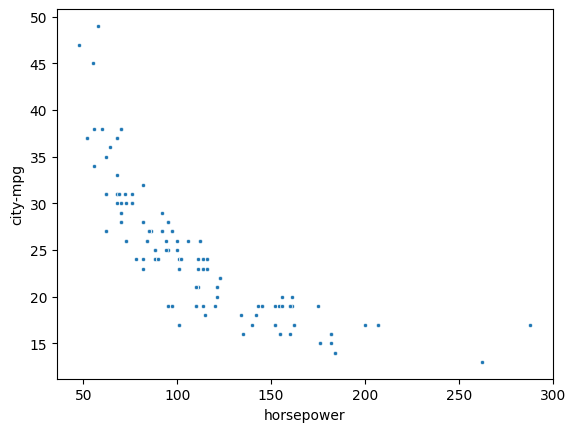

In [10]:
sns.scatterplot(x = x, y = y, marker = '.')
plt.show()

Conclusion: From what we see on the scatterplot, we can suppose the model to be a linear regression one

## Model

We assume a linear regression model. Horsepower and city consumption are not random: they come from car specifications. We have $n=203$ measurements $(x_i,y_i)$ where $x_i$ is the horsepower and $y_i$ the city consumption in miles per gallon for car $i$. We consider the data is an $n$-sample $((X_1,Y_1),...,(X_n,Y_n))$ and assume 
$$Y_i = a + b\, x_i +\varepsilon_i\text{ for }i\in\{1,...,n\}$$
where $\varepsilon_1$, ..., $\varepsilon_n$ are independent and distributed as $\mathcal{N}(0,\sigma^2)$, $a$, $b$ and $\sigma>0$ being unknown parameters.

### Estimations on parameters

Purpose: Make estimations on linear regression parameters, which we will use to make conclusions and perform calculations 

Justification: We want to estimate all unknown parameters using `linregress` function from `scipy` library to use them further

In [11]:
lin_reg = st.linregress(x,y)
lin_reg

LinregressResult(slope=np.float64(-0.13295813351790903), intercept=np.float64(39.10308343730555), rvalue=np.float64(-0.8036201591529729), pvalue=np.float64(3.486622018320233e-47), stderr=np.float64(0.006945236687230929), intercept_stderr=np.float64(0.7745981060361218))

Conclusion: We managed to perform this operation and will conclude the values got further

Purpose: Get $\hat a$ and $\hat b$ from our `lin_reg` variable to see their values and use them for calculations 

Justification: We want to see $\hat a$ and $\hat b$, then use them also for calculations. To do this, we will get attributes `intercept` and `slope` from our `lin_reg` object

In [12]:
a_hat = lin_reg.intercept
b_hat = lin_reg.slope
f'a hat: {a_hat:.3f}, b hat: {b_hat:.3f}'

'a hat: 39.103, b hat: -0.133'

Conclusion: $\hat b$ is not 0, which means there `might` still be correlation between $x_i$ and $Y_i$

Purpose: Calculate $\sigma^2$ for finding outliers and predicting, also concluding it to be more than 0

Justification: We need $\sigma^2$ for other sections, for this we need to calculate the error first, which is $y$ - ($\hat a$ + $\hat b$ * $x$), then we will use `sum` from `numpy` library to make a sum of squares and divide them by $n-2$ to finally get our value

In [13]:
y_hat = a_hat + b_hat * x
err = y - y_hat
sse = np.sum(err**2)
sigma_2_hat = sse/(n-2)
f'sigma^2 hat: {sigma_2_hat:.3f}'

'sigma^2 hat: 15.368'

Conclusion: Our $\sigma^2$ is approximately 15.368, which does not really tell us anything, except that it is apart from 0

### Visualization

Purpose: Calculate `poly` with `poly1d` class from `numpy` library for plotting regression lines

Justification: We use `poly1d` class that takes operations on polynomials so that said operations take on their customary form in code. We will need this during plotting our regression line and CI lines

In [14]:
fit = [b_hat, a_hat]
poly = np.poly1d(fit)

Conclusion: The calculation was successfully executed

Purpose: Plot the regression line on our scatter plot to see how it fits

Justification: We calculate the dispersion, use it to calculate the bounds, which will be used in calculating our $\hat y$ using calculated before `poly` object. All these steps are essential to plot the regression line

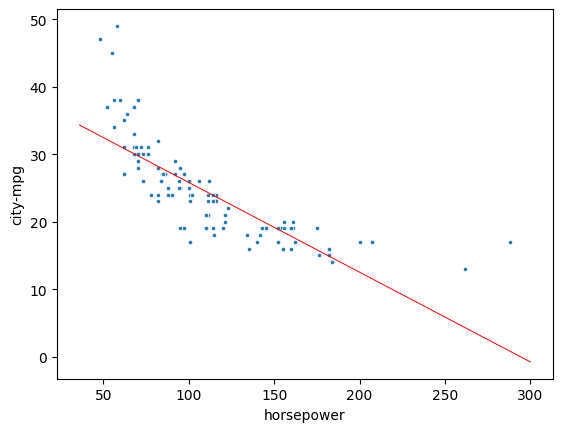

In [15]:
disp = max(x)-min(x)
lower_bound = min(x)-disp/20
upper_bound = max(x)+disp/20
z = [lower_bound, upper_bound]
sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(z,poly(z),'r-', linewidth = 0.7)
plt.show()

Conclusion: We managed to plot the line, and it nicely fits

### Analysis

Purpose: Calculate $R^2$ and $p$-value to check linear dependence and the relation between $x$ and $Y$

Justification: We use our `lin_reg` object to get these values from it. Their values will give us some insights, but the variables themselves will not be used further

In [16]:
R_2 = lin_reg.rvalue**2
p_value = lin_reg.pvalue
f'R^2 = {R_2:.3f}, p-value = {p_value:.2e}'

'R^2 = 0.646, p-value = 3.49e-47'

Conclusion: $R^2$ is far from 1, but closer to 1 than to 0, which shows the existence of some effect that $x$ puts on $Y$, but not all variance of $Y$ can be understood from $x$. The significance test has a $p$-value that is almost 0, which implies significant linear relationship

### Outliers

Purpose: Plot CI bounds to check the existence of outliers

Justification: We use the same method as in the Visualization part to plot the regression line, but also we add lines for doubled $\sigma$, which is basically doubled standard deviation. As for the tech implementation, it is also the same. The result will help us conclude the absence or existence of outliers

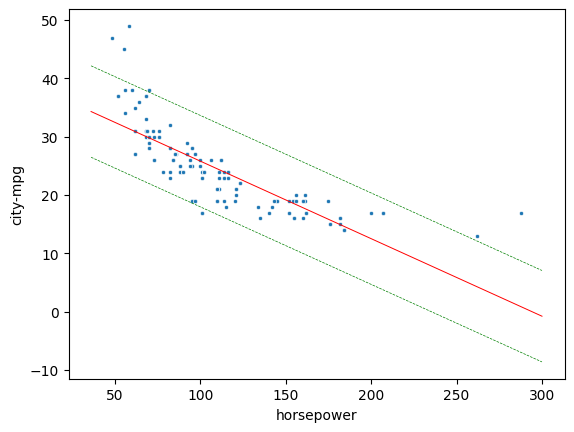

In [17]:
sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(z,poly(z),'r-', linewidth = 0.7)
plt.plot(z,poly(z)+2*np.sqrt(sigma_2_hat),'g--', linewidth = 0.5)
plt.plot(z,poly(z)-2*np.sqrt(sigma_2_hat),'g--', linewidth = 0.5)
plt.show()

Discussion on outliers

Possible causes:
- Measurement errors
- Special vehicle types (hybrids or sports cars)
- Data anomalies

Impact:

Such outliers might reflect important insights. They also may bias the model

Next Steps:

I could attempt to figure out the origin of these outliers and apply other techniques and tests in order to handle them. I could also try to leave them and see the model like it is

### Residual analysis

Purpose: Visualize residuals, detect heteroscedasticity

Justification: We scatter residuals and predicted values with `scateer`, `plot` the $y = 0$ line using `matplotlib.pyplot` to understand what we have declared above

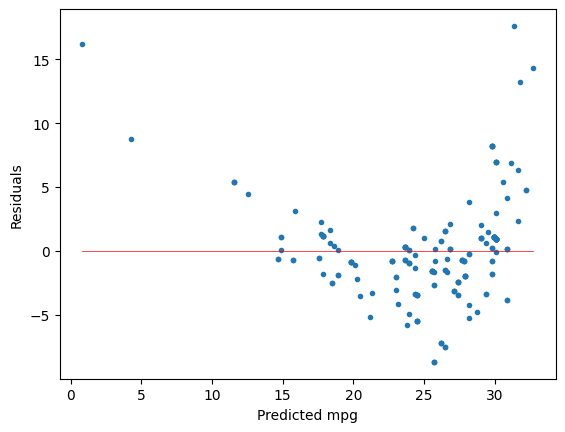

In [18]:
plt.scatter(x = y_hat, y = err, marker = '.')
plt.plot([min(y_hat),max(y_hat)],[0,0], 'r', linewidth = 0.5)
plt.xlabel('Predicted mpg')
plt.ylabel('Residuals')
plt.show()

Conclusion: There seem to be heteroscedasticity, the amplitude of the errors does not seem constant

Purpose: Another representation of what we have done above. As in the previous representation, we verify that the points are situated on both sides of the diagonal and that the amplitude of variations remains $not$ constant

Justification: We `scatter` our real values and the predicted values we got , then we also `plot` the diagonal line, and we use `axis` to have Cartesian coordinates using `matplotlib.pyplot`

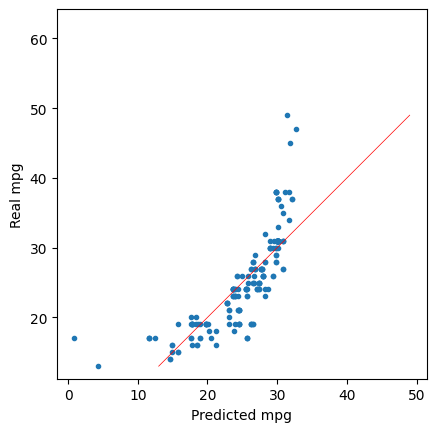

In [19]:
plt.scatter(x = y_hat, y = y, marker = '.')
plt.plot([min(y),max(y)],[min(y),max(y)], 'r', linewidth = 0.5)
plt.xlabel('Predicted mpg')
plt.ylabel('Real mpg')
plt.axis('square')
plt.show()

Conclusion: There seem to be heteroscedasticity

Purpose: The code is to model the residuals of a regression as a normal distribution with mean zero and estimated variance $\hat \sigma^2$ to check if they follow a normal distribution

Justification: Use `norm` with `loc = 0` (sets the mean of the normal distribution to 0) and `scale = np.sqrt(sigma_2_hat)` (sets the standard deviation of the distribution) using `scipy.stats` and `numpy` to get the distribution

In [20]:
dist = st.norm(loc = 0., scale = np.sqrt(sigma_2_hat))

Conclusion: We got our Gaussian distribution in the `dist` variable

Purpose: The purpose of this code is to evaluate whether the residuals of a model follow a normal distribution by using a Quantile-Quantile (Q-Q) plot (visually)

Justification: The code uses `probplot` to create a Q-Q plot, we compare the error to the theoretical normal distribution. The `axis('square')` makes equal scaling on both axes

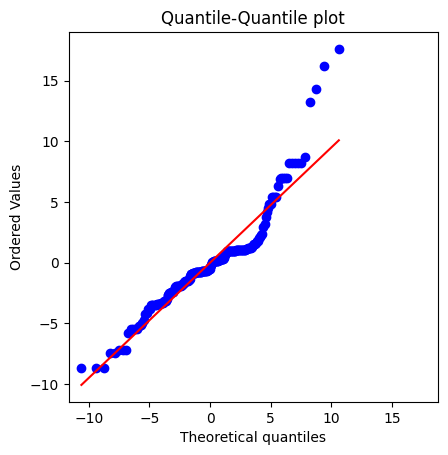

In [21]:
st.probplot(err, dist = dist, plot=plt)
plt.axis('square')
plt.title('Quantile-Quantile plot')
plt.show()

Conclusion: The residuals deviate from the normal distribution. We have potential issues with the normality assumption

### Durbin and Watson test of auto-correlation

Purpose: $H_0$:[the $\epsilon_i$ are not correlated], $H_1$:[($\epsilon_i$)$_i$ is a first order autoregressive process]

Justification: `diff` computes the difference between consecutive residuals. Squaring these differences and summing them quantifies how much the residuals change between observations. Dividing by the `sse` normalizes the value

In [22]:
dur = np.sum(np.diff(err)**2)/sse
dur

np.float64(1.403572741970797)

Conclusion:

We read the table for $\alpha = 0.05$, $n = 200$ and $k = 1$: $d_L = 1.76$ and $d_U = 1.78$

$dur < d_L$, which means that the error terms may be negatively autocorrelated, so we cannot reject the hypothesis $H_1$ of auto-correlation. 

### Prediction

Purpose: Present the confidence interval for the mean prediction and the prediction interval for the city consumption with level of confidence 95\% with respect to the horsepower to conclude the typical city consumption interval drop with the raise of horsepower

Justification: Construct CI for the mean and prediction intervals for new observations based on a polynomial regression model, and then use the outcome for plotting. We generate 21 evenly spaced points between the bound with `linspace` from `numpy`, then compute predicted values from the polynomial model at $x_0$, calculate the variance adjustment for CI estimation for variable $v_0$ using `var` and `mean` from `numpy`, calculate the critical value from the t-distribution with n-2 degrees of freedom for a given $\alpha$ = 0.05 using `t.ppf` from `scipy.stats`, compute the margin of error for the CI of the mean using `sqrt` from `numpy`, compute the bounds for the mean, compute the margin of error for the prediction interval, and conclude prediction level bounds

In [23]:
x0 = np.linspace(lower_bound, upper_bound, 21) 
y0_hat = poly(x0)
v_adj = (np.var(x)+(x0-np.mean(x))**2)/(n*np.var(x)) 

alpha = 0.05
t = st.t.ppf(1-alpha/2, n-2)

margin_err_mean = t*np.sqrt(sigma_2_hat*v_adj)
mean_lower = y0_hat - margin_err_mean
mean_upper = y0_hat + margin_err_mean

margin_err_pred = t*np.sqrt(sigma_2_hat*(1+v_adj))
lowest_value  = y0_hat - margin_err_pred
highest_value = y0_hat + margin_err_pred

Conclusion: We performed the needed calculations and are now ready to plot them and see the outcome

Purpose: Plot everything we have calculated before to make the overall conclusion

Justification: Use `scatterplot` from `seaborn` to draw the scatter and `plot` from `matplotlib.pyplot` to draw the lines of regression, mean prediction, and prediction intervals

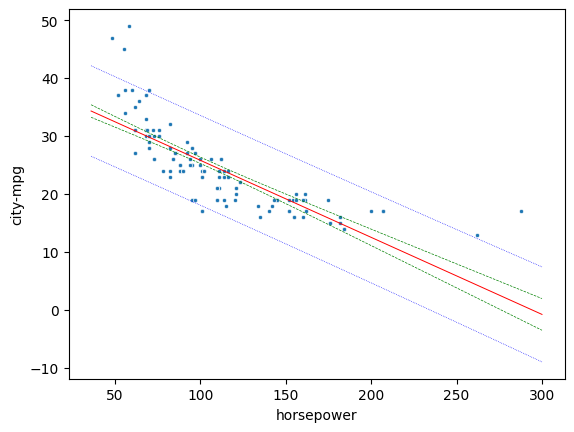

In [24]:
sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(x0,poly(x0),'r-', linewidth = 0.7)
plt.plot(x0,mean_lower, 'g--', linewidth = 0.5)
plt.plot(x0, mean_upper, 'g--', linewidth = 0.5)
plt.plot(x0, lowest_value, 'b:', linewidth = 0.5)
plt.plot(x0, highest_value, 'b:', linewidth = 0.5)
plt.show()

Conclusion: We have plotted everything, and we see a nice outcome

#### Overall conclusion:
We can predict at 95% the efficiency and mean efficiency of fuel consumption in the city with respect to the horsepower of the engine. With horsepower rising we have more efficient fuel consumption

## Model 2 - LOGARITHMIC

We assume a logarithmic regression model. Horsepower and city consumption are not random: they come from car specifications. We have $n=203$ measurements $(x_i,y_i)$ where $x_i$ is the horsepower and $y_i$ the city consumption in miles per gallon for car $i$. We consider the data is an $n$-sample $((X_1,Y_1),...,(X_n,Y_n))$ and assume 
$$Y_i = a + b\, *log(x_i) +\varepsilon_i\text{ for }i\in\{1,...,n\}$$
where $\varepsilon_1$, ..., $\varepsilon_n$ are independent and distributed as $\mathcal{N}(0,\sigma^2)$, $a$, $b$ and $\sigma>0$ being unknown parameters.

`Note:` Here I repeat most of the iterations from the first part, so I will explain only the results and changes where implemented

### Estimations

In [25]:
x_log = np.log(x)
lin_reg = st.linregress(x_log, y)
lin_reg

LinregressResult(slope=np.float64(-16.557129293757395), intercept=np.float64(101.14119929540784), rvalue=np.float64(-0.8731171102945627), pvalue=np.float64(1.2383633689798816e-64), stderr=np.float64(0.652076438896012), intercept_stderr=np.float64(2.997679748172448))

In [26]:
a_hat = lin_reg.intercept
b_hat = lin_reg.slope
f'a hat: {a_hat:.3f}, b hat: {b_hat:.3f}'

'a hat: 101.141, b hat: -16.557'

In [27]:
y_hat = a_hat + b_hat * x_log
err = y - y_hat
sse = np.sum(err**2)
sigma_2_hat = sse/(n-2)
f'sigma^2 hat: {sigma_2_hat:.3f}'

'sigma^2 hat: 10.312'

In [28]:
poly = lambda x: a_hat + b_hat * np.log(x)

Here I have changed poly from
```python
fit = [b_hat, a_hat]
poly = np.poly1d(fit)
```
The reason is, my model is no longer linear but logarithmic

### Visualization

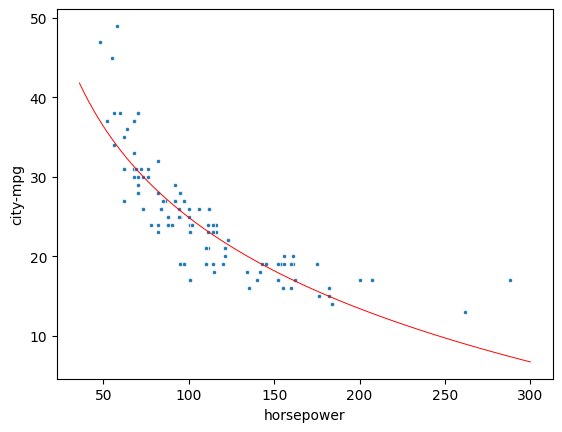

In [29]:
disp = max(x) - min(x)
lower_bound = min(x) - disp / 20
upper_bound = max(x) + disp / 20
z = np.linspace(lower_bound, upper_bound, 100)
sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(z, poly(z), 'r-', linewidth=0.7)
plt.show()

<b>As we can notice, the line seems to fit a little better, but still nothing is clear</b>

### Analysis

In [30]:
R_2 = lin_reg.rvalue**2
p_value = lin_reg.pvalue
f'R^2 = {R_2:.3f}, p-value = {p_value:.2e}'

'R^2 = 0.762, p-value = 1.24e-64'

Conclusion on the analysis is the same: $R^2$ is far from 1, but closer to 1 than to 0, which shows the existence of some effect that $x$ puts on $Y$, but not all variance of $Y$ can be understood from $x$. The significance test has a $p$-value that is almost 0, which implies significant linear relationship

### Outliers

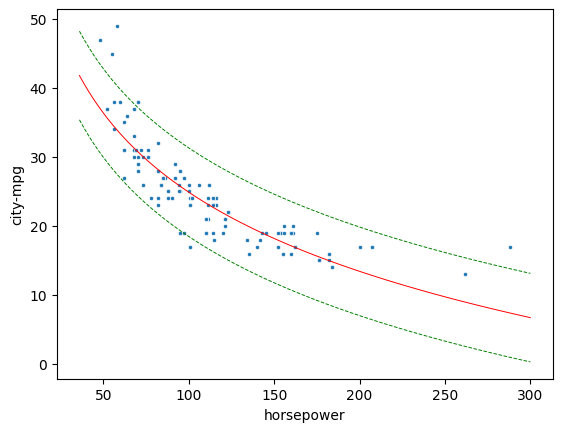

In [31]:
sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(z,poly(z),'r-', linewidth = 0.7)
plt.plot(z,poly(z) + 2 * np.sqrt(sigma_2_hat),'g--', linewidth = 0.7)
plt.plot(z,poly(z) - 2 * np.sqrt(sigma_2_hat),'g--', linewidth = 0.7)
plt.show()

<b>We get even more outliers than in the linear model, this does not seem good</b>

### Residual analysis

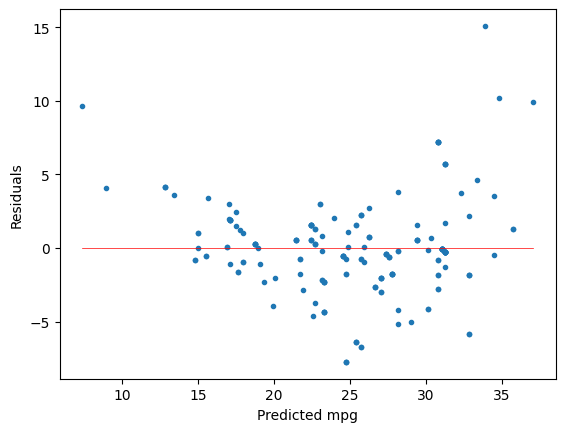

In [32]:
plt.scatter(x = y_hat, y = err, marker = '.')
plt.plot([min(y_hat),max(y_hat)],[0,0], 'r', linewidth = 0.5)
plt.xlabel('Predicted mpg')
plt.ylabel('Residuals')
plt.show()

Still, there seem to be heteroscedasticity. <b>Nevertheless, the graph looks better than for the Model 1</b>

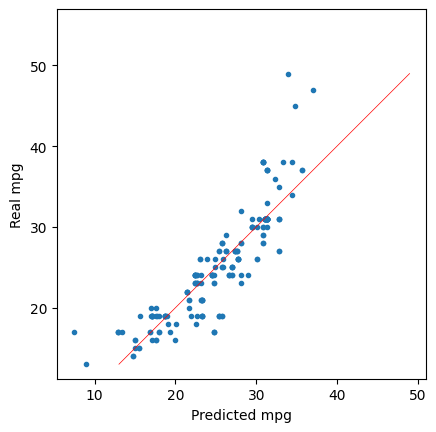

In [33]:
plt.scatter(x = y_hat, y = y, marker = '.')
plt.plot([min(y),max(y)],[min(y),max(y)], 'r', linewidth = 0.5)
plt.xlabel('Predicted mpg')
plt.ylabel('Real mpg')
plt.axis('square')
plt.show()

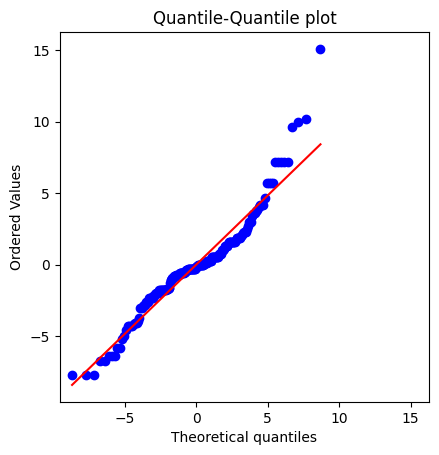

In [34]:
dist = st.norm(loc = 0., scale = np.sqrt(sigma_2_hat))
st.probplot(err, dist = dist, plot=plt)
plt.axis('square')
plt.title('Quantile-Quantile plot')
plt.show()

<b>The Q-Q plot also looks better, but we have one outlier and an S-shape deviation from the line</b>

### Durbin and Watson test

$H_0$:[the $\epsilon_i$ are not correlated], $H_1$:[($\epsilon_i$)$_i$ is a first order autoregressive process]

In [35]:
d = np.sum(np.diff(err)**2)/sse
d

np.float64(1.4407769639642933)

We read the table for $\alpha = 0.05$, $n = 200$ and $k = 1$: $d_L = 1.76$ and $d_U = 1.78$

$d < d_L$, which means that the error terms may be negatively autocorrelated, so we cannot reject the hypothesis $H_1$ of auto-correlation. 

<b>Nothing has changed here from Model 1</b>

### Prediction

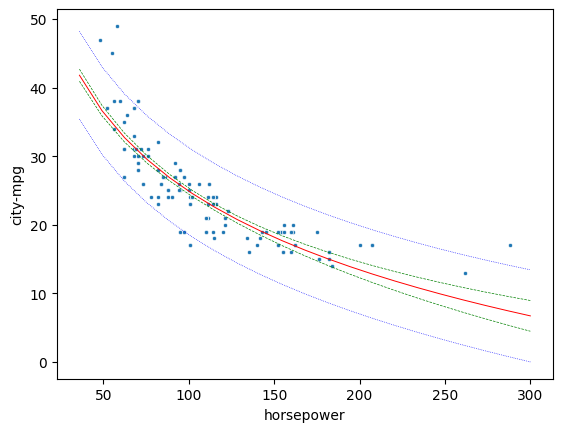

In [36]:
x0 = np.linspace(lower_bound, upper_bound, 21) 
y0_hat = poly(x0)
v_adj = (np.var(x)+(x0-np.mean(x))**2)/(n*np.var(x)) 

alpha = 0.05
t = st.t.ppf(1-alpha/2, n-2)

margin_err_mean = t*np.sqrt(sigma_2_hat*v_adj)
mean_lower = y0_hat - margin_err_mean
mean_upper = y0_hat + margin_err_mean

margin_err_pred = t*np.sqrt(sigma_2_hat*(1+v_adj))
lowest_value  = y0_hat - margin_err_pred
highest_value = y0_hat + margin_err_pred

sns.scatterplot(x = x, y = y, marker = '.')
plt.plot(x0,poly(x0),'r-', linewidth = 0.7)
plt.plot(x0,mean_lower, 'g--', linewidth = 0.5)
plt.plot(x0, mean_upper, 'g--', linewidth = 0.5)
plt.plot(x0, lowest_value, 'b:', linewidth = 0.5)
plt.plot(x0, highest_value, 'b:', linewidth = 0.5)
plt.show()

We can predict at 95% the efficiency and mean efficiency of fuel consumption in the city with respect to the horsepower of the engine. With horsepower rising we have more efficient fuel consumption

<b>Compared to the fist Model prediction, this one gives much more sense</b>